<a href="https://colab.research.google.com/github/alamwasim/microstructure-alignment/blob/template-matching/microstructure_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import imutils

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
PATH_OF_DATA= """/content/gdrive/'My Drive'/'ML microstructure alignment'/"""
!ls {PATH_OF_DATA}

26.jpg	27.jpg


In [5]:
!cp '/content/gdrive/My Drive/ML microstructure alignment/26.jpg' "26.jpg"
!cp '/content/gdrive/My Drive/ML microstructure alignment/27.jpg' "27.jpg"

In [6]:
img26 = cv2.imread('26.jpg',0)
img27 = cv2.imread('27.jpg',0)

In [7]:
img26.shape, img27.shape

((1536, 2048), (1536, 2048))

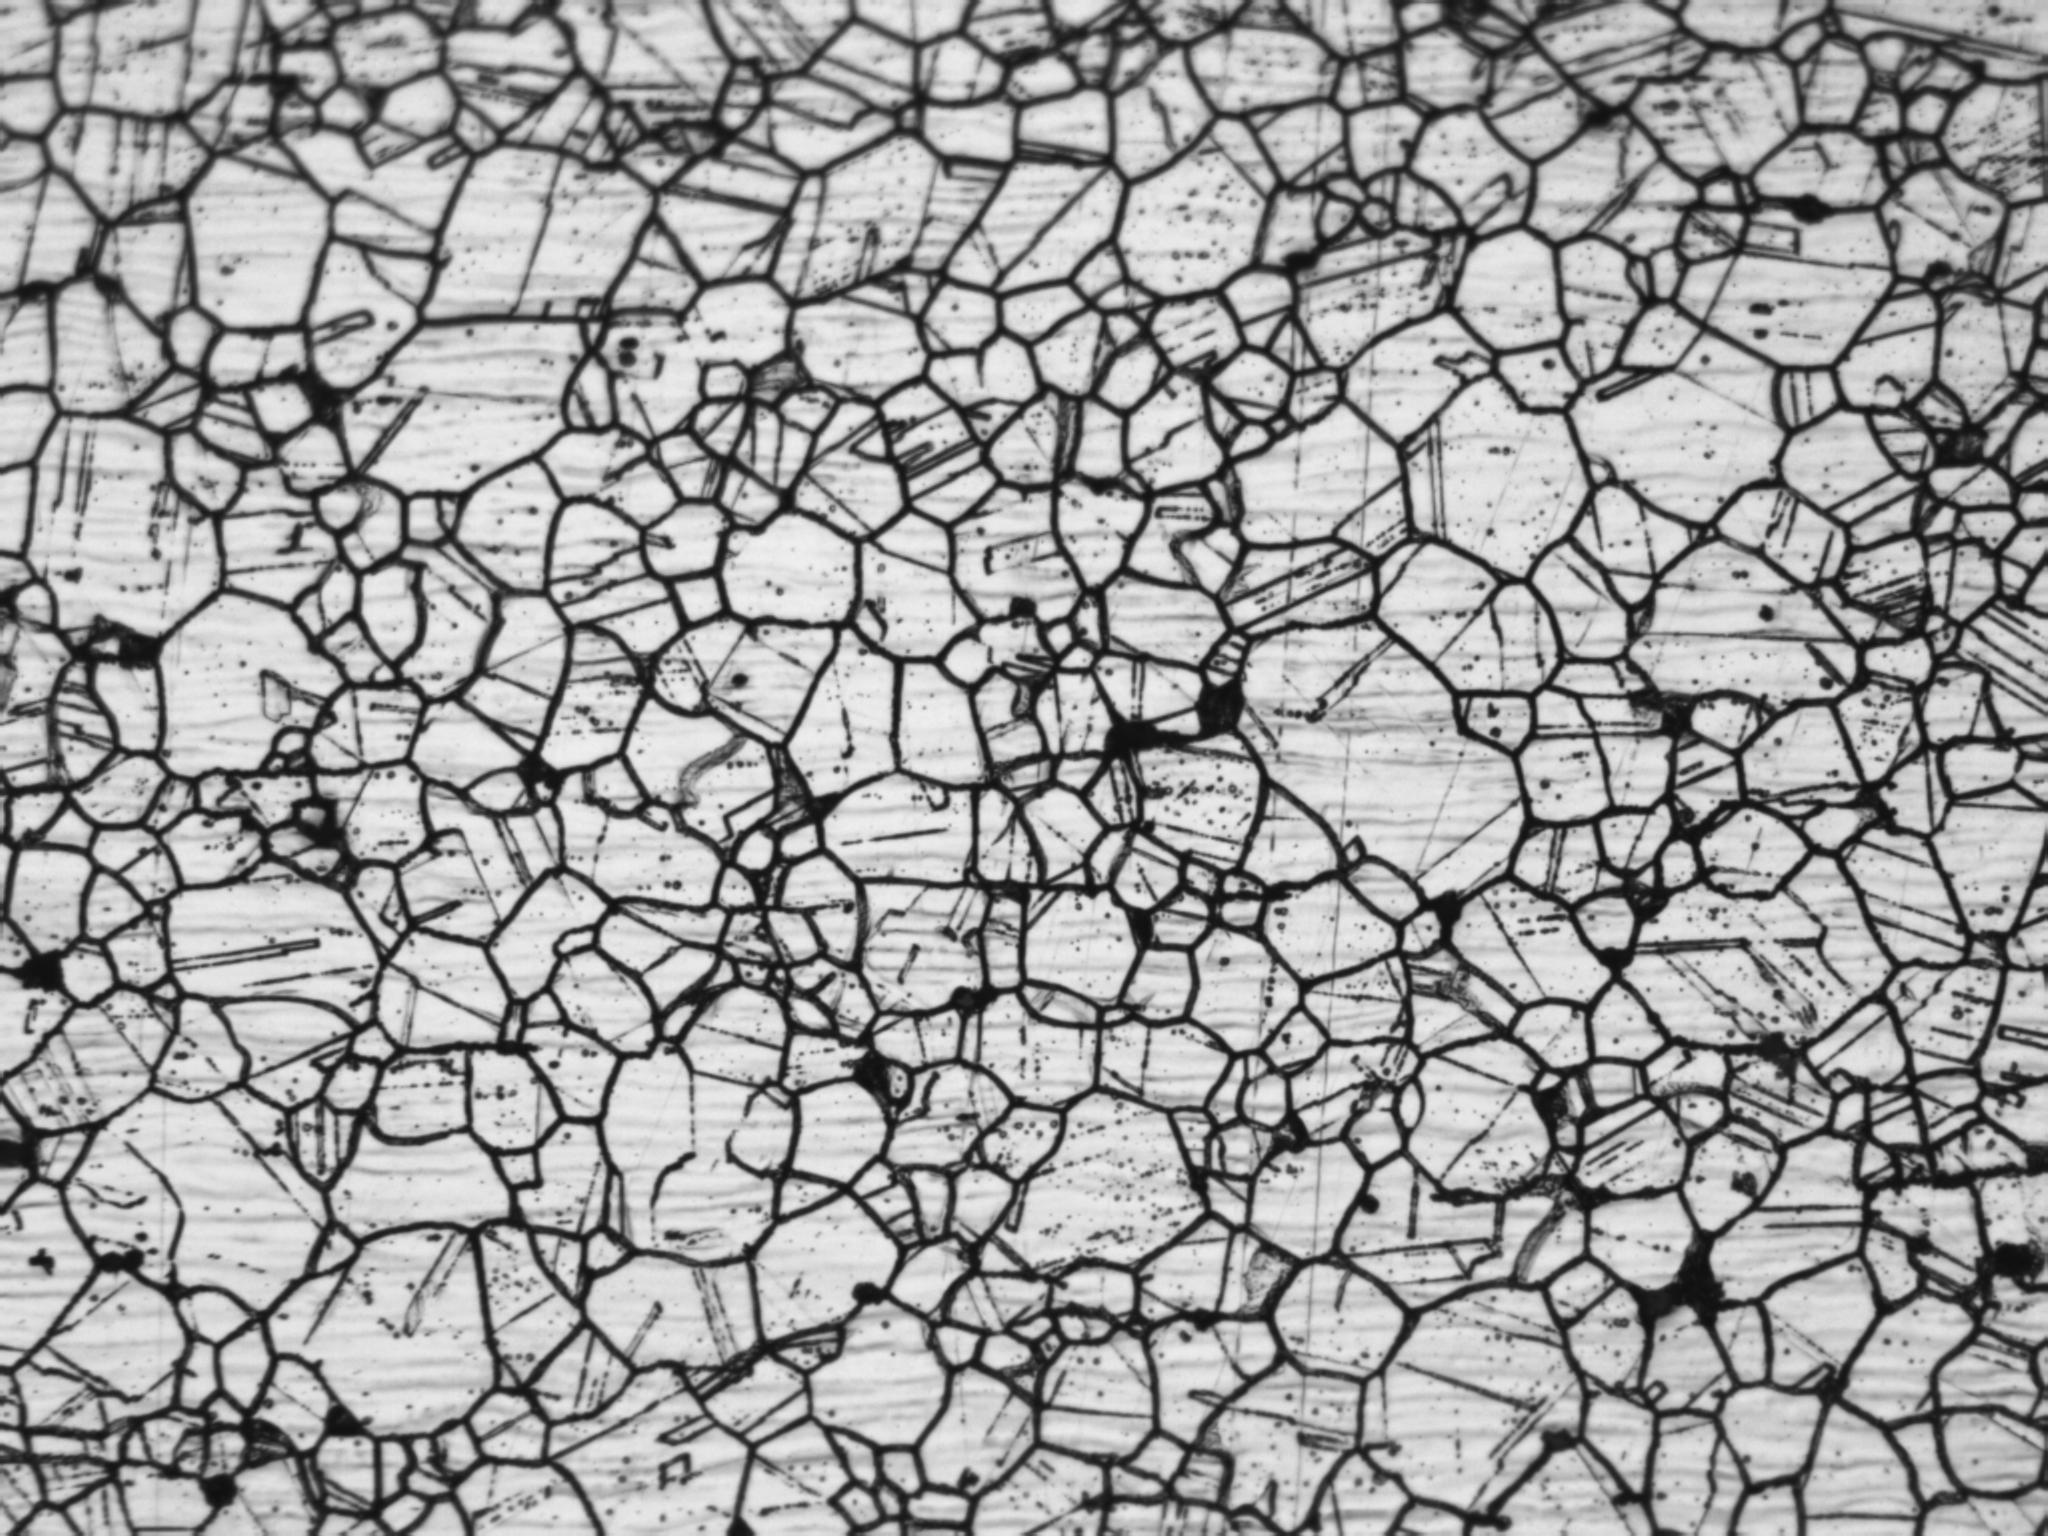

In [8]:
cv2_imshow(img26)

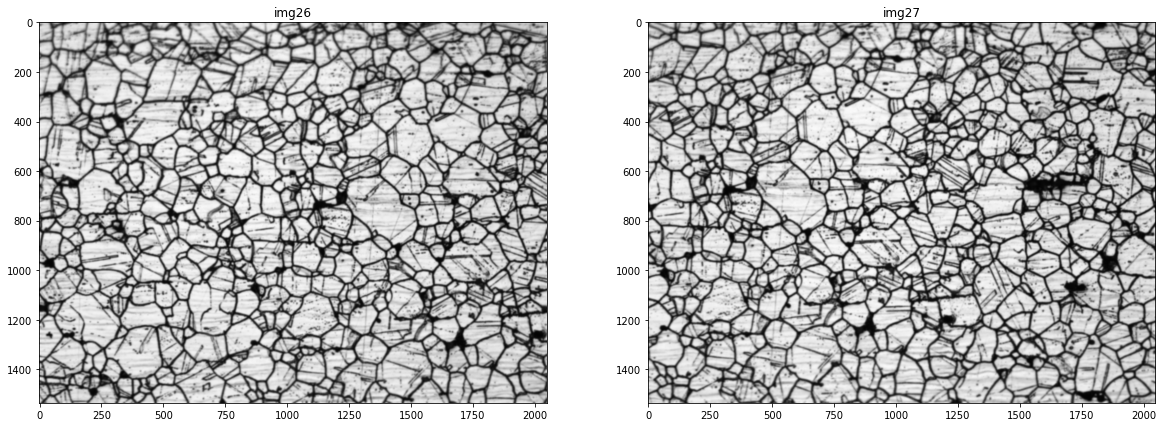

In [8]:
# Show the image with cv2_imshow
# cv2_imshow(img26)
#Show the image with matplotlib
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
fig, (ax1, ax2,) = plt.subplots(figsize=(20, 20), ncols=2)
ax1.imshow(img26, cmap = 'gray', interpolation = 'bicubic')
ax2.imshow(img27, cmap = 'gray', interpolation = 'bicubic')
ax1.title.set_text('img26')
ax2.title.set_text('img27')
plt.show()

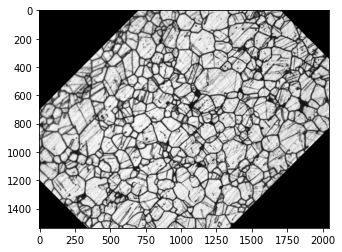

In [28]:
img = img26.copy()
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst,cmap='gray')

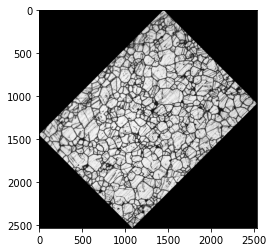

In [24]:
plt.imshow(imutils.rotate_bound(img26,-45),cmap='gray')

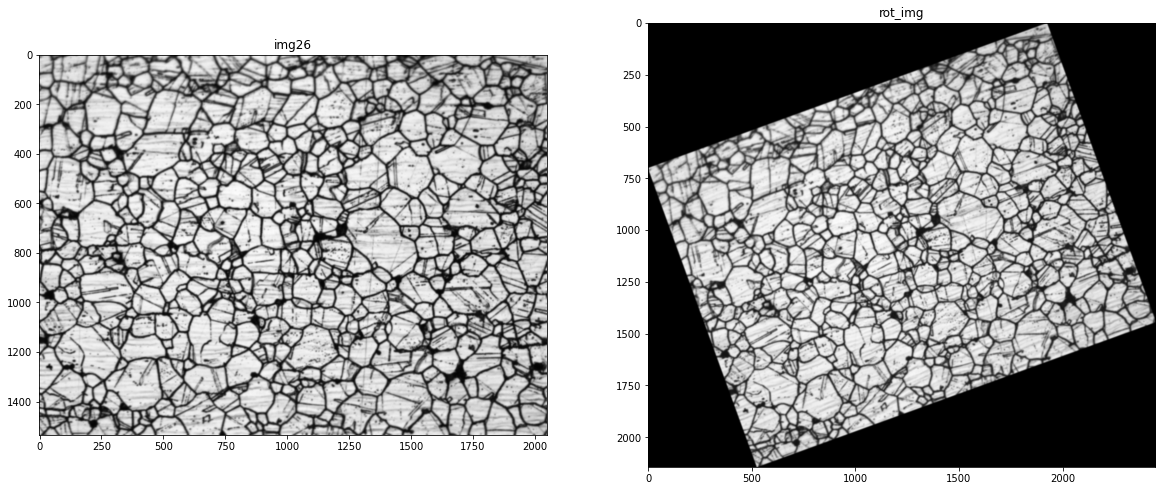

In [30]:
rot_img=imutils.rotate_bound(img26,-20)
fig, (ax1, ax2,) = plt.subplots(figsize=(20, 20), ncols=2)
ax1.imshow(img26, cmap = 'gray', interpolation = 'bicubic')
ax2.imshow(rot_img, cmap = 'gray', interpolation = 'bicubic')
ax1.title.set_text('img26')
ax2.title.set_text('rot_img')
plt.show()

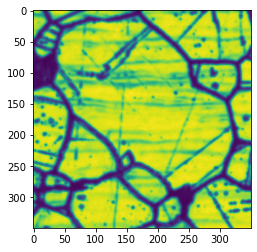

In [ ]:
ax,ay=400,550
a=img27[ay:ay+350,ax:ax+350]
plt.imshow(a)

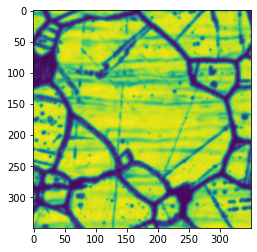

In [ ]:
bx,by=1205,613
b=img26[by:by+350,bx:bx+350]
plt.imshow(b)

cv2.TM_CCOEFF
(1203, 611) (1553, 961)


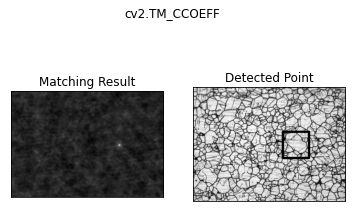

cv2.TM_CCOEFF_NORMED
(1203, 611) (1553, 961)


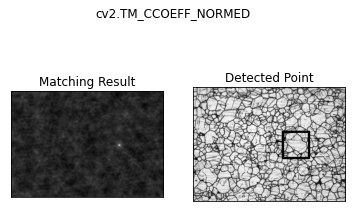

cv2.TM_CCORR
(1203, 611) (1553, 961)


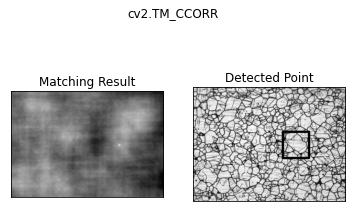

cv2.TM_CCORR_NORMED
(1203, 611) (1553, 961)


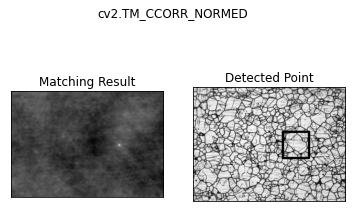

cv2.TM_SQDIFF
(1203, 611) (1553, 961)


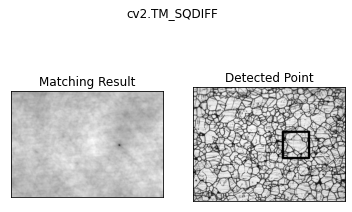

cv2.TM_SQDIFF_NORMED
(1203, 611) (1553, 961)


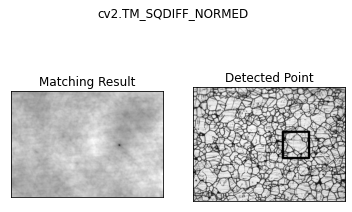

In [ ]:
img = img26.copy()
img2 = img.copy()
template = a
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    print(meth)
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    print(top_left,bottom_right)

    cv2.rectangle( img,top_left, bottom_right, 0, 30)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [ ]:
print("selective cropped coordinate in img27",(ax,ay),".Selective cropped Matched coordinate in  img26",top_left )
dx,dy=top_left[0]-ax,top_left[1]-ay
print("img26-img27 distance","dx:",dx,"dy:",dy)

selective cropped coordinate in img27 (400, 550) .Selective cropped Matched coordinate in  img26 (1203, 611)
img26-img27 distance dx: 803 dy: 61


In [31]:
def template_matching(img, template,method):
  h, w = template.shape[::-1]
  meth = eval(method)
  img=img.copy()

  # Apply template Matching
  res = cv2.matchTemplate(img,template,meth)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  
  # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + h, top_left[1] + w)
  print("top_left and bottom_right",top_left,bottom_right)
  print("min_val and max_val",min_val,max_val)
  
  cv2.rectangle( img,top_left, bottom_right, 0, 30)
  
  plt.subplot(141),plt.imshow(template,cmap = 'gray')
  plt.title('Template'), plt.xticks([]), plt.yticks([])
  plt.subplot(142),plt.imshow(img,cmap = 'gray')
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.subplot(143),plt.imshow(img[top_left[1]:top_left[1]+w,top_left[0]:top_left[0]+h],cmap = 'gray')
  plt.title('Detected Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(144),plt.imshow(res,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.show()
  return top_left,min_val,max_val

******************** Kernel Centre Point (250, 250) Kernel top left corner  [0, 0] ********************


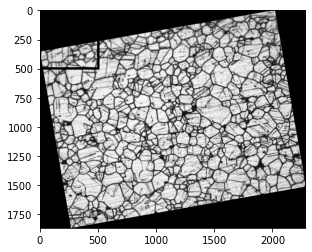

top_left and bottom_right (465, 1) (965, 501)
min_val and max_val -0.1524723768234253 0.214919775724411


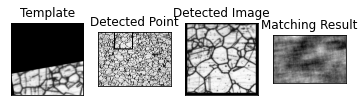

******************** Kernel Centre Point (250, 750) Kernel top left corner  [0, 500] ********************


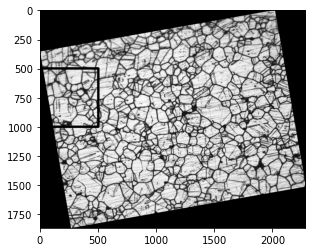

top_left and bottom_right (406, 366) (906, 866)
min_val and max_val -0.17491105198860168 0.21775782108306885


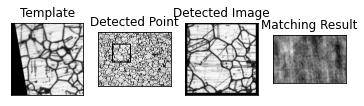

******************** Kernel Centre Point (250, 1250) Kernel top left corner  [0, 1000] ********************


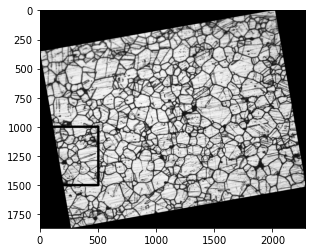

top_left and bottom_right (293, 243) (793, 743)
min_val and max_val -0.2134387344121933 0.21603289246559143


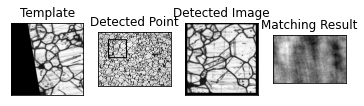

******************** Kernel Centre Point (250, 1750) Kernel top left corner  [0, 1500] ********************


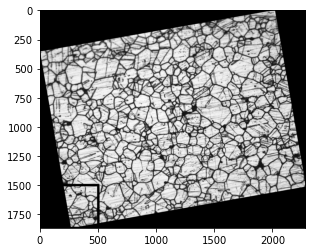

top_left and bottom_right (237, 414) (737, 781)
min_val and max_val -0.25996240973472595 0.25577181577682495


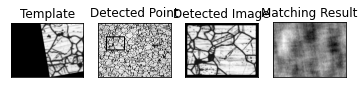

******************** Kernel Centre Point (750, 250) Kernel top left corner  [500, 0] ********************


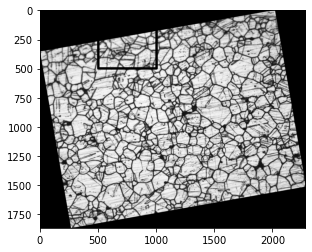

top_left and bottom_right (450, 1) (950, 501)
min_val and max_val -0.15449684858322144 0.23222164809703827


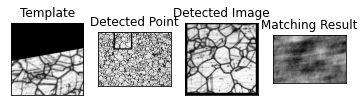

******************** Kernel Centre Point (750, 750) Kernel top left corner  [500, 500] ********************


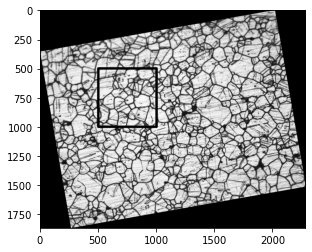

top_left and bottom_right (593, 544) (1093, 1044)
min_val and max_val -0.1008668765425682 0.11583700776100159


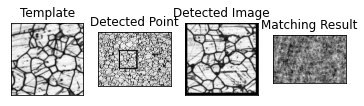

******************** Kernel Centre Point (750, 1250) Kernel top left corner  [500, 1000] ********************


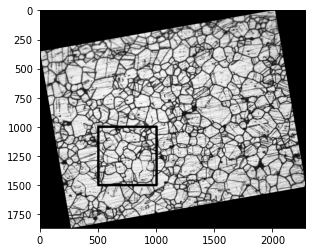

top_left and bottom_right (186, 940) (686, 1440)
min_val and max_val -0.10279581695795059 0.09615077823400497


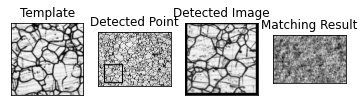

******************** Kernel Centre Point (750, 1750) Kernel top left corner  [500, 1500] ********************


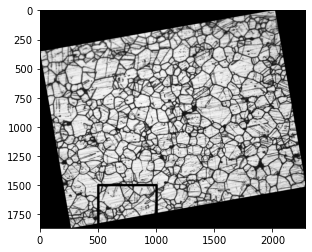

top_left and bottom_right (1387, 334) (1887, 701)
min_val and max_val -0.2708743214607239 0.1808653026819229


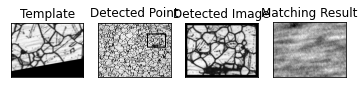

******************** Kernel Centre Point (1250, 250) Kernel top left corner  [1000, 0] ********************


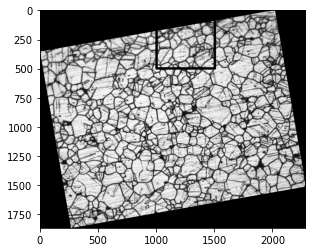

top_left and bottom_right (459, 105) (959, 605)
min_val and max_val -0.14329387247562408 0.20210570096969604


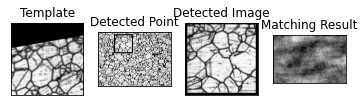

******************** Kernel Centre Point (1250, 750) Kernel top left corner  [1000, 500] ********************


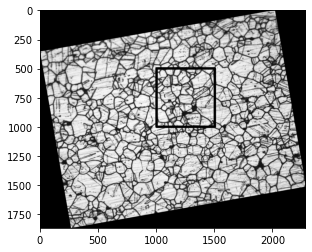

top_left and bottom_right (87, 280) (587, 780)
min_val and max_val -0.10777461528778076 0.15537381172180176


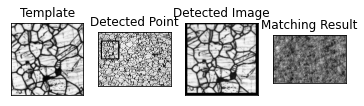

******************** Kernel Centre Point (1250, 1250) Kernel top left corner  [1000, 1000] ********************


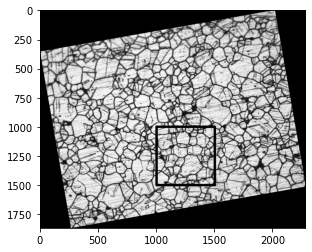

top_left and bottom_right (45, 785) (545, 1285)
min_val and max_val -0.11475283652544022 0.1396767944097519


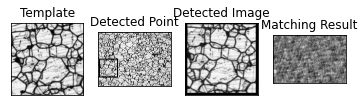

******************** Kernel Centre Point (1250, 1750) Kernel top left corner  [1000, 1500] ********************


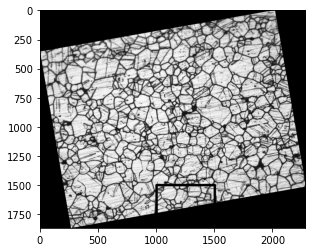

top_left and bottom_right (795, 764) (1295, 1131)
min_val and max_val -0.27769744396209717 0.1796552985906601


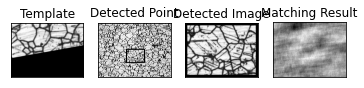

******************** Kernel Centre Point (1750, 250) Kernel top left corner  [1500, 0] ********************


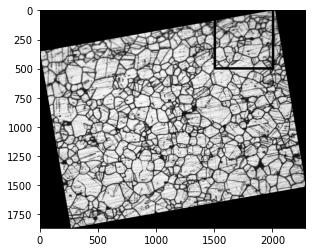

top_left and bottom_right (569, 129) (1069, 629)
min_val and max_val -0.13340069353580475 0.15243975818157196


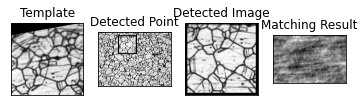

******************** Kernel Centre Point (1750, 750) Kernel top left corner  [1500, 500] ********************


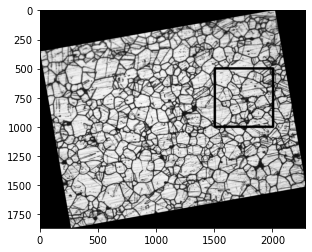

top_left and bottom_right (617, 368) (1117, 868)
min_val and max_val -0.12655125558376312 0.14132319390773773


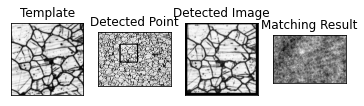

******************** Kernel Centre Point (1750, 1250) Kernel top left corner  [1500, 1000] ********************


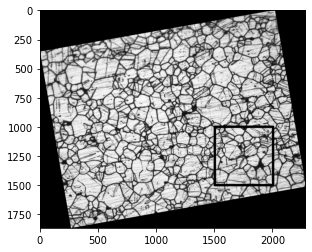

top_left and bottom_right (488, 894) (988, 1394)
min_val and max_val -0.1124800592660904 0.1400611847639084


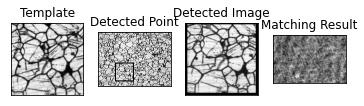

******************** Kernel Centre Point (1750, 1750) Kernel top left corner  [1500, 1500] ********************


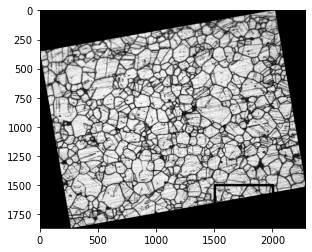

top_left and bottom_right (639, 337) (1139, 704)
min_val and max_val -0.27698850631713867 0.1844160556793213


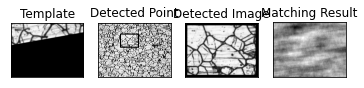

******************** Kernel Centre Point (2250, 250) Kernel top left corner  [2000, 0] ********************


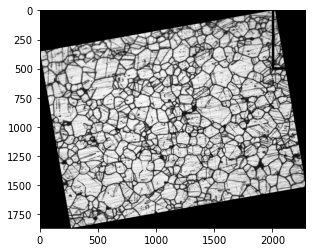

top_left and bottom_right (1421, 455) (1703, 955)
min_val and max_val -0.3092222213745117 0.22821761667728424


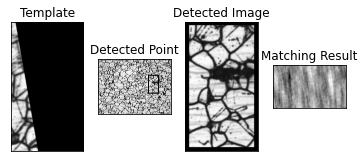

******************** Kernel Centre Point (2250, 750) Kernel top left corner  [2000, 500] ********************


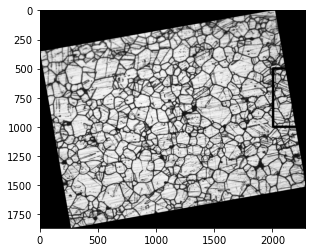

top_left and bottom_right (926, 3) (1208, 503)
min_val and max_val -0.2333989441394806 0.23004257678985596


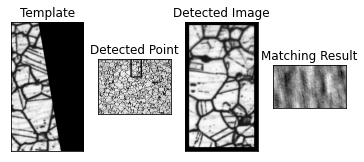

******************** Kernel Centre Point (2250, 1250) Kernel top left corner  [2000, 1000] ********************


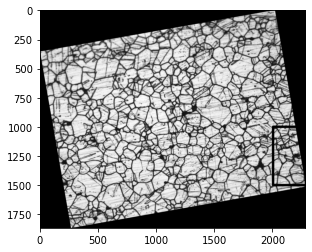

top_left and bottom_right (857, 17) (1139, 517)
min_val and max_val -0.18121777474880219 0.2115466147661209


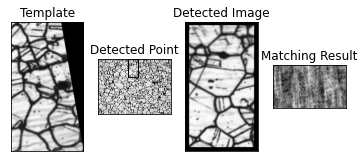

******************** Kernel Centre Point (2250, 1750) Kernel top left corner  [2000, 1500] ********************


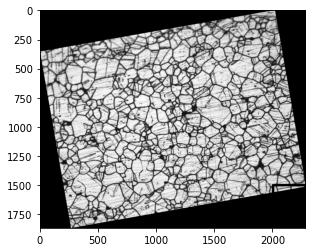

top_left and bottom_right (569, 724) (851, 1091)
min_val and max_val -0.414401113986969 0.20729634165763855


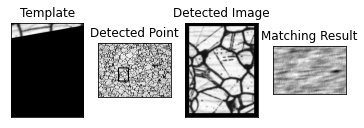



Max Value for lable got 0.25577181577682495 (250, 1750, [0, 1500])
dx []
dy []
Template have to be move by (nan, nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
kernel=500
stride=500
threshold=0.99
template_img=imutils.rotate_bound(img26,-10)
img=img27.copy()
MAX=0
MAX_LABLE=0
dx=[]
dy=[]
for i in range(kernel//2,template_img.shape[1],stride):
  for j in range(kernel//2,template_img.shape[0],stride):
    img2=template_img.copy()
    top_left=[i-kernel//2,j-kernel//2]
    bottom_right=[top_left[0]+kernel,top_left[1]+kernel]
    if(bottom_right[0]>=template_img.shape[1]):
      bottom_right[0]=template_img.shape[1]-1
    if (bottom_right[1]>=template_img.shape[0]):
        bottom_right[1]=template_img.shape[0]-1
    print("*"*20,"Kernel Centre Point",(i,j),"Kernel top left corner ",top_left,"*"*20)
    cv2.rectangle( img2,tuple(top_left), tuple(bottom_right), 0, 20)
    plt.imshow(img2,cmap = 'gray')
    plt.show()
    template=template_img[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
    matched_top_left,min_val,max_val=template_matching(img,template,methods[1])
    if(max_val>threshold):
      dx.append(matched_top_left[0]-top_left[0])
      dy.append(matched_top_left[1]-top_left[1])

    if(max_val>MAX):
      MAX=max_val
      MAX_LABLE=(i,j,top_left)
print("\n\nMax Value for lable got",MAX,MAX_LABLE)
print("dx",dx)
print("dy",dy)
dx,dy=np.mean(dx),np.mean(dy)
print("Template have to be move by",(dx,dy))

       



In [ ]:
#Template matching is able to match the big grain in both normal and oriented images. However the max threshold values for those are coming very les(0.15 approx).
# Also this thing will not give us any orientaion angle by which image should be rotated back

#**Analysis Result**

> Template matching is able to match the big grain in both normal and oriented images. However the max threshold values for those are coming very les(0.15 approx).
Also this thing will not give us any orientaion angle by which image should be rotated back


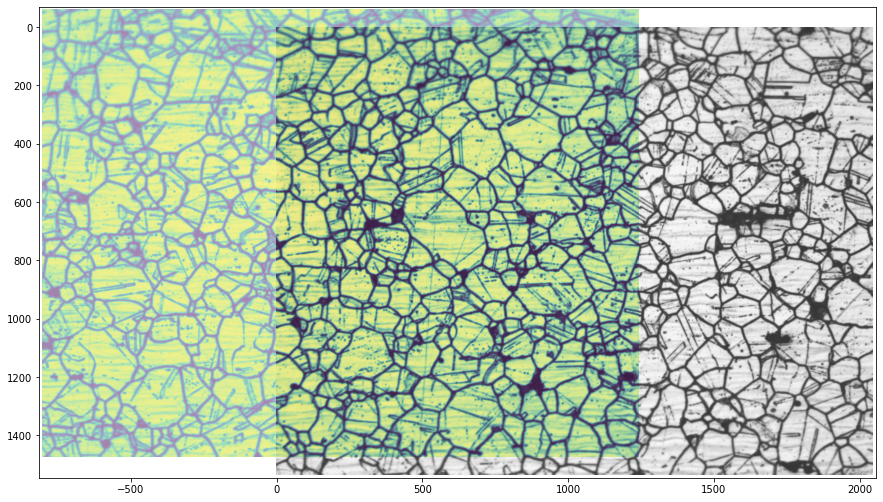

In [ ]:
fig = plt.gcf()
ax = fig.gca()
ax.imshow(img,cmap='gray',alpha=0.8)
nrows,ncols=template_img.shape
ax.imshow(template_img,alpha=0.5,extent=[dx,ncols+dx,nrows+dy,dy])
ax.set_xlim(dx-10,img.shape[1]+10)
ax.set_ylim(img.shape[0]+10,dy-10)
fig.set_size_inches(15,10)

In [ ]:
 fig.savefig("aligned.png")

In [ ]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()